<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/03_1_SVD_Karman_Vortex_Street.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

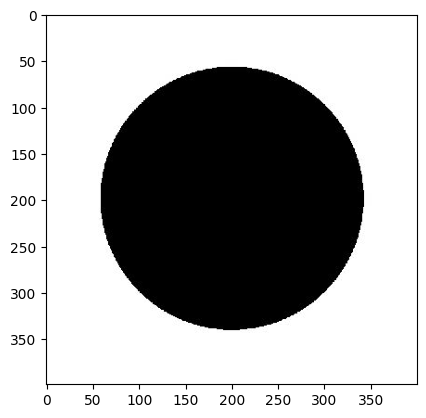

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from urllib.request import urlopen

# get the image from the url
#url = "https://upload.wikimedia.org/wikipedia/commons/f/fb/Karmansche_Wirbelstr_kleine_Re.JPG"
url = "https://upload.wikimedia.org/wikipedia/commons/2/2c/Vortex-street-1.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg"
image = Image.open(urlopen(url))

# convert the image to grayscale
image = image.convert('L')

# convert the image to a numpy array
X = np.array(image)

# plot the image
plt.imshow(X, cmap='gray')
plt.show()


In [59]:
print("Dimension of X :", X.ndim)
print("Shape of X     :", X.shape)
print("Size of X      :", X.size)

Dimension of X : 2
Shape of X     : (399, 400)
Size of X      : 159600


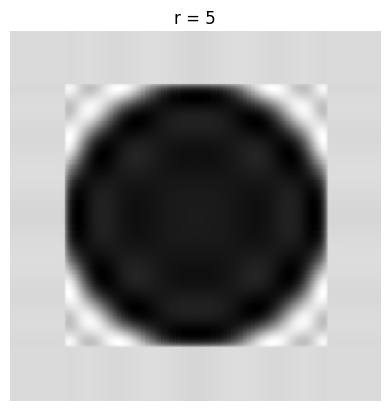

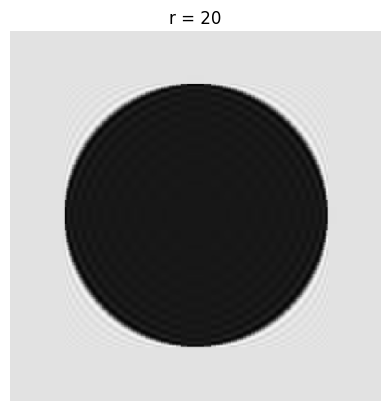

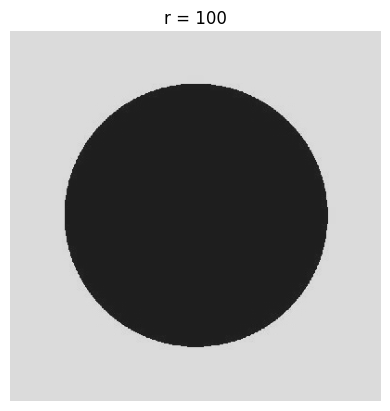

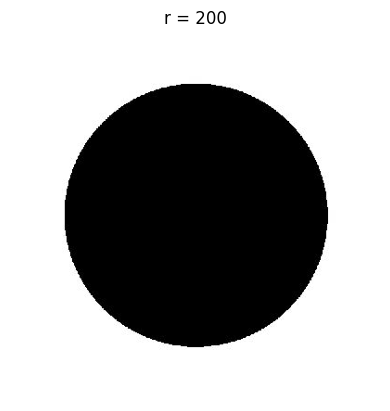

In [60]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100, 200):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [61]:
print("Matrix U")
print("Dimension :", U.ndim)
print("Shape     :", U.shape)
print("Size      :", U.size)

Matrix U
Dimension : 2
Shape     : (399, 399)
Size      : 159201


In [62]:
print("Matrix S")
print("Dimension :", S.ndim)
print("Shape     :", S.shape)
print("Size      :", S.size)

Matrix S
Dimension : 2
Shape     : (399, 399)
Size      : 159201


In [63]:
print("Matrix VT")
print("Dimension :", VT.ndim)
print("Shape     :", VT.shape)
print("Size      :", VT.size)

Matrix VT
Dimension : 2
Shape     : (399, 400)
Size      : 159600


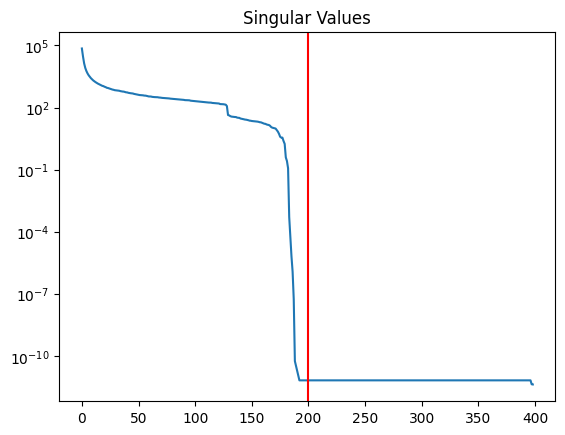

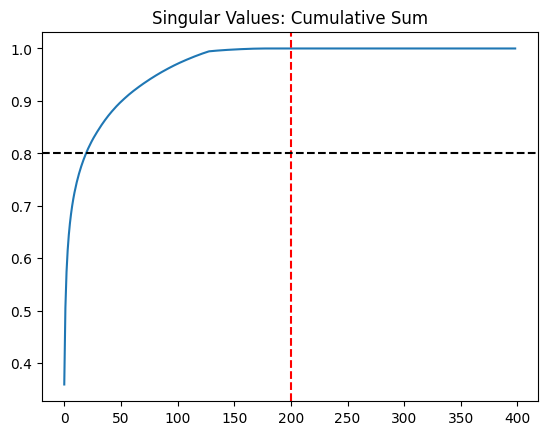

In [64]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.axvline(200, color='red')
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.axvline(200, color='red',linestyle='dashed')
plt.axhline(0.8, color='black',linestyle='dashed')
plt.title('Singular Values: Cumulative Sum')
plt.show()